# Thinking About Data for Plotting
---

## Learning Objectives
- Understand the difference between continuous and categorical data
- Understand what nested data is
- Understand why it is important to consider nesting structures when computing and visualizing variance
- Understand the differences between wide- and long-format data
---

## Introduction
Visualization is an incredibly powerful way to present data. However, to generate effective plots, you need to understand the structure and organization of your data. In particular, you need to consider the different **variables** present in your data, whether they are **continuous** or **categorical**, and whether they are **nested** (often called *repeated measures*). In this lesson we'll review these different types of data and some common approaches to plotting them. 

This isn't only important for plotting --- as a data scientist, it's always important to understand and be able to describe the structure of your data. This is essential for being able to perform appropriate analyses, and interpret the results correctly. But plotting both exposes the importance of data organization, and helps us understand it as well.

Since we've worked with the Gapminder GDP data set a bit, let's look at it now and discuss the data types and structure. We'll read in the Oceania data set (which has only two countries) and then display the DataFrame:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')
df

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


## Continuous Data

Continuous data comprises most numeric data that you will encounter. Values can range continuously (i.e., in very small steps) across some range of values (possibly infinite, but typically with practical bounds when dealing with neuroscientific or psychological data). Continuous variables in psychology and neuroscience can include reaction times, voltage measurements in electrophysiology, fMRI activation levels, etc.. In Python, numeric data are typically stored as integers or floating point numbers. 

### Thought Question
In the Gapminder GDP dataset shown above, what variables are continuous?

```{admonition} Click the button to reveal the solution
:class: dropdown

- GDP is continuous. The values representing gross domestic product represent millions of dollars, and are stored as floating point numbers
- Year is also, a continuous numeric variable. However, the way it is represented in the Gapminder datasets is categorical — data is only available for only certain years; these years are the same for all countries, and each year's data is stored in a separate column. However, "year" itself is a continuous variable, most typically represented as integers.
```

## Categorical Data

Categorical data comprises most data that is not numeric. For example, in a drug study someone might receive an experimental drug or a placebo — it's one or the other. Or in a language study, each participant might be classified as a native English speaker or someone who learned English as a second language. Categorical data can include data that have some degree of continuity. For example, Some people learn English from their parents as the only language they hear in the first year of their lives, whereas others may hear another language at home but learn English fluently from an early age, from other kids in the neighborhood. So in many cases, we *treat* data as categorical — often for convenience — even when there are subtleties that are lost.

### Thought Question
What variable(s) in the Gapminder GDP set are categorical?

```{admonition} Click the button to reveal the solution
:class: dropdown

- Country is definitely categorical. Each country has its own GDP values
- As noted above, year is treated as categorical, because in the Gapminder data set, not all years are present so they are not truly continuous. However, we would often consider year as continuous in this context, because it is a unit of time. For instance, when we plot year on the *x* axis of a line plot, it is treated as continuous.
- We also created a categorical variable called "region" in one lesson, sorting countries into northern/southern/eastern/western Europe

```

## Ordinal Data

Another type of data that you ay occasionally encounter is **ordinal data**. Ordinal data are *ordered* (hence the stem *ord-*), and as such fall somewhere between continuous and categorical data. Ordinal data can be distinguished from continuous data in that the levels (values) of an ordinal variable are *discrete* steps, which are ranked (i.e., ordered). Thus the steps between each level of an ordinal variable are treated as equivalent in magnitude. This is different from  continuous data, where the differences between values are quantifiable and measurable. 

For instance, imagine we take measurements of the weight of an animal at 4 time points: when the animal is aged 1 day, 5 days, 10 days, and 28 days. If we treat time as a continuous variable, then the gaps between measurements are 4, 5, and 18 (in days). However, if we treat time as an ordinal variable, then the gaps between each measurement are all treated as 1. 

Treating data as ordinal can be useful for some types of categorical data in particular. For example, if we have ratings on a Likert scale such as *Never – Almost Never – Sometimes – Almost Always – Always*, then it makes sense to treat these are ordered, rather than as 5 unordered categories.

For the time being we will focus on continuous and categorical data, but it is worth noting that there are other ways of representing data as well.

## Making Continuous Data Categorical

Continuous data can sometimes be made categorical as well. For example, height is a continuous variable, but for convenience in a research study we might want to classify people as "short", "medium", or "tall" rather than their precise height in centimetres. In research with children, participants are often categorized into groups such as grades 1-2, grades 3-4, grades 5-6, instead of treating grade (or age) as a continuous variable. This process of turning continuous data into categorical is called **discretizing** (making discrete). It can be useful if the data you collect aren't as continuous as the possible range of values (e.g., children's academic knowledge and abilities are typically more related to their grade level than their chronological age), or for ease of generalization. If continuous data are split into only two categories (e.g., tall vs. short), this is called **binarizing** the data. 

## Plotting Continuous and Categorical Data

Recognizing which variables are continuous or categorical is important, because in many cases you need to plot them differently. Continuous data lend themselves to things like continuous lines (e.g., regression lines) and scatterplots. In contrast, plotting categorical data typically involves different plot "objects" for each category, such as different bars in a bar graph, or different lines in a line plot. Often continuous and categorical data are combined in one plot, as shown below for the Gapminder GDP data, where each line shows the relationship between two continuous variables (year and GDP), and the categorical data are represented by separate lines for each country:

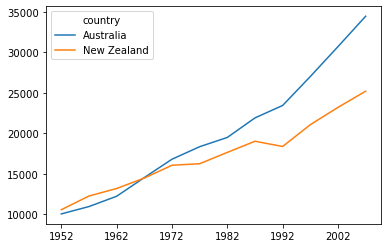

In [7]:
df.columns = df.columns.str.strip('gdpPercap_')
df.T.plot()
plt.show()

## Distributions

A critical property of any data set is the **distribution** of values, also commonly called its **variance**. Variance is actually where *all the information* is. If every data point were the same, the data couldn't tell us anything. Data are only interesting, or informative, if it contains *meaningful variability*. Data science is founded on different ways of assessing variability and giving it meaning. Often we talk about *systematic variability*, in other words variability that we can attribute to some measurable, systematic difference. For example, if children in grades 1-2 have smaller vocabularies than children in grades 3-4, we can say that vocabulary size varies systematically according to some property of each child — specifically what grade they are in.

A critical fact in data is that variance is always present, but is typically in part systematic — related to something we measure — and in part random (often called "noise"). Visualization is a useful tool in exploring data in order to identify possible systematic patterns in data. Critically, we need to visualize how the *distribution* of values of some measurement vary with respect to some other variable. The fact that there is random variability in all data (at least, all neuroscience and psychology data) means that we can't just look at the average values of data points in, say, each of two groups of school children. Their averages may be numerically different, but the critical question is whether the typical variability in their values differs systematically between higher and lower grades. Plotting distributions of data is a useful way of comparing distributions. Commonly in neuroscience and psychology, we also use statistical tests to estimate our level of certainty that a difference is believable. We will come to statistical testing later, but for now we focus on making inferences based on visualization of the data. Well-designed visualizations can actually provide the same level of precision and confidence as statistical testing.

In the next lesson, in learning about the Seaborn plotting package we'll discuss visualizing distributions and making inferences from them. Below is a preview – a box plot which shows the distribution of GDP values across all years, for each country. If you're not familiar with box plots, the Seaborn chapter will bring you up to speed.

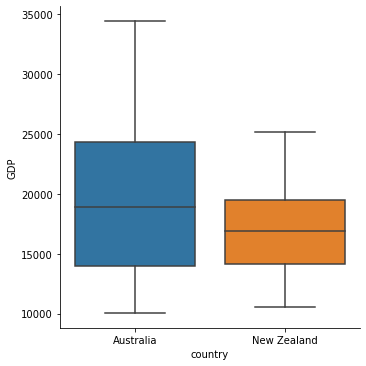

In [11]:
import seaborn as sns 
df = df.melt(var_name='year', value_name='GDP', ignore_index=False)
sns.catplot(kind='box',
           data=df.reset_index(), 
           x='country', y='GDP')

plt.show()

## Nested Data

Nested data occur when some measurements are "nested" or isolated inside other variables. This is very common in cognitive and neuroscience research, where we take many measurements from each individual participant (e.g., lots of experimental trials, recording from multiple electrodes). Indeed, nested data is often called **repeated measures** because repeated measurements are taken from the same "unit" of data (such as a human or animal participant). Nested data can be continuous or categorical, but the variable that they are nested inside is almost always categorical (e.g., individual people or animals). 

Examples of nested data include reaction times (RTs) obtained across a number of experimental trials from the same participant. Often data are **recursively nested**, meaning that there are multiple layers of nesting. For example, in a typical RT experiment, there are multiple experimental conditions, each with many trials, administered to each participant. In this case, RTs on dinvidual trials are nested within experimental conditions, which are in turn nested within individual participants. If the study involves multiple groups (e.g., patients vs. controls), then participants are further nested within groups. As another example, in educational research data may be collected from children in different schools; in this case data may be nested within each child, and children are in turn nested inside schools. 

Recognizing nested data is important because, the amount of variability within an individual (or other nesting category) may be different than the variability between individuals (or other categories). As discussed above, in exploratory data analysis (EDA) — as well as in statistics — measures of variability are an important way that we make inferences about the data. 

For example, say we run a reaction time experiment with 100 trials, and 10 participants. We thus have 100 x 10 = 1000 data points. The variability is likely lower within an individual than between – one participant may be on average 150 ms faster than another, but each individual may only show a variation of +/- 25 ms in their personal average reaction times. In this case, if we compute the average RT over all 1000 trials, without considering nesting structure, our measure of the variance across the 1000 trials will be very low (around 25 ms), because each individual contributes so many (similar) trials. But if we first average across the 100 trials for each participant, then compute the variability between these averages, we will capture just the person-to-person difference (which would be more like 150 ms in this example). In this case the variance reflects the true person-to-person variation, which is typically what we are interested in when running experiments across groups of individuals. 

## Representations of Data

After thinking about the structure (organization of data) at a conceptual level, we need to think about how this is actually stored in data files. Although this is an extensive subject, for now we will focus on data stored in pandas DataFrames, because pandas is a powerful tool and we've already started learning how to work with pandas. 

pandas DataFrames are a **two-dimensional** way of storing data. The two dimensions are rows and columns. But within this framework, we can store extremely complex data containing many values, and many variables as well. 

### Long- vs. Wide-Form Data

Many software tools represent data in two-dimensional row-column format, including Microsoft Excel, Google Sheets, and SPSS. Across all of them, data can be stored in two ways.

In **wide-form** data, each unit of obesrvation (such as a human or animal research participant) is associated with one measurement of each experimental variable. So each row in the DataFrame contains all the data from one participant, and columns represent individual measured variables, including different levels of the same variable. The Gapminder GDP data set is an example of wide-form data. Each row contains all the data associated with a particular country, and the columns represent all the different measurements we have. The data values in all of the columns are GDP in millions of dollars, and the different columns store data from different levels of the "years" variable.

In [1]:
df = pd.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
df.head()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803
Bulgaria,2444.286648,3008.670727,4254.337839,5577.002800,6597.494398,7612.240438,8224.191647,8239.854824,6302.623438,5970.388760,7696.777725,10680.792820


In contrast, **long-form** data requires fewer columns to represent a particular data set, but more rows. Measurements from a single source (e.g., experimental participant) are stored across several rows. Rather than each level of each variable having its own column, only two columns are required: one specifying the level of the variable, and one specifying the value of the measurement at that level of the variable, for that participant. If we were to convert the Gapminder GDP data to long form, rather than having many columns for the different years, we would have one column labeled "year", that contained different values of year (e.g., 1900, 1920, etc.) and a second column called "GDP" that contained the GDP values in millions of dollars. Thus each country would have as many rows in the DataFrame as there were years for which we had measurements. Long-form data is often used with nested (repeated measures) data. 

With pandas it's quite easy to convert wide-form data to long-form using the `.melt()` method. By default, `.melt()` will "melt" all of the data columns into one long column, and put the original column headings in a second column. We can use the kwargs `var_name=` and `value_name=` to name the columns that take the original column names and values in the columns, respectively.

Below we convert the GDP data to long form as described above. Prior to doing so, we use another pandas method, `str.strip()`, to remove the leading text (`gdpPercap_`) from each column so that the resulting `year` column contains only the numerical year.

In [2]:
df.columns = df.columns.str.strip('gdpPercap_')
df = df.melt(var_name='year', value_name='GDP', ignore_index=False)

You can see below that after the row for the last country in 1952, the list of countries repeats again, now for the year 1957, and so on.

In [3]:
df.head(35)

,year,GDP
country,,
Albania,1952,1601.056136
Austria,1952,6137.076492
Belgium,1952,8343.105127
Bosnia and Herzegovina,1952,973.533195
Bulgaria,1952,2444.286648
Croatia,1952,3119.236520
Czech Republic,1952,6876.140250
Denmark,1952,9692.385245
Finland,1952,6424.519071


---
## Summary

- Data are measurements, comprising a set of values
- Each type of measurement can be called a **variable**
- **Continuous variables** are typically numeric, and represent values sampled from a continuum — a continuous range
- **Categorical variables** are those where values are one of a limited number of different categories
- **Ordinal values** are ordered (ranked), but the steps between the levels of the variable are treated as equivalent
- Continuous data can be made categorical by **discretizing** them. Similar values along the continuum are grouped into bins or categories for the purposes of simplification. If only two categories are created, this is called **binarizing** the data
- It is important to understand the differences between continuous, categorical, and ordinal data because the nature of the data affects how you visualize, analyze, and interpret the data
- Continuous data have a **distribution** of values, ranging from the minimum to maximum measured values. Distributions have other properties, including the median and inter-quartile range.
- **Nested** data occur when one set of measurements is taken within another. For example, measurements of reaction time across trials may be nested within individual participants, or students may be nested within schools.
- It is important to consider the nesting structure of data when examining variance, because variance is often lower within a nesting structure (e.g., across trials within a participant) than at the next-higher level (e.g., between participants). Conflating variance across nesting levels can artificially decrease the measurement of variance that is appropriate for inference (e.g., variance between individuals, not within, is typically most relevant in psychology and neuroscience studies).
- Data can be represented in a 2D structure such as a spreadsheet or pandas DataFrame, as wide- or long-format
- **Wide-format** data has levels of at least one categorical variable represented as separate columns (i.e., each level of the variable is a separate column)
- **Long-format** data has one column for each variable, and one row for each measurement. Long-format data is generally preferred, and it is what we will primarily work with moving forward in this course.
- Wide-format data can easily be converted to long-format data in pandas, using the `.melt()` method
